In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

In [2]:
# Create Regression Dataset
N = 1000

X1 = np.random.randn(N)
X2 = np.random.randn(N)

X = np.array([X1,X2]).T
T = X1*X2

<IPython.core.display.Javascript object>


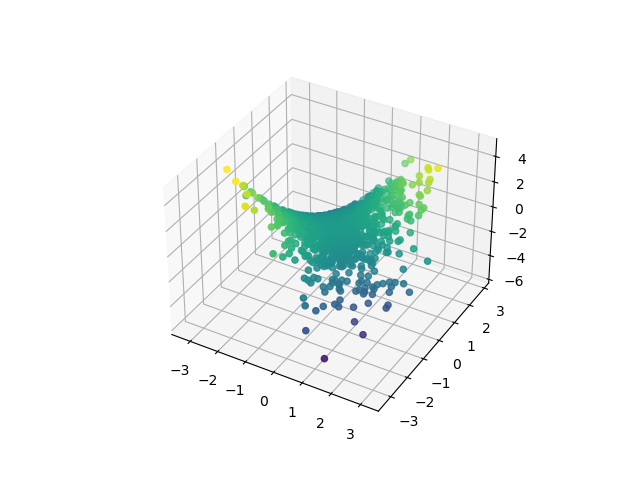

In [4]:
# plot 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(X1,X2,T, c=T)
plt.show()

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def tanh(z):
    return (np.exp(z)-np.exp(-z)) / (np.exp(z)+np.exp(-z))

In [7]:
def relu(z):
    return z*(z>0)

In [8]:
def nonlinearGrad(z,activation):
    if activation=="sigmoid":
        return z*(1-z)
    if activation=="tanh":
        return (1-z**2)
    if activation=="relu":
        return z*(z>0)

In [9]:
def cost(y,yhat):
    return np.mean((y-yhat)**2)

In [10]:
def forward(X,W,B,A,hidden_units,activation,i,seed):
    D = X.shape[1]
    L = len(hidden_units)
    np.random.seed(seed)
    
    for l in range(L+1):
        if l==0:
            if i==0:
                W[l] = np.random.randn(D,hidden_units[l])
                B[l] = np.random.randn(hidden_units[l])
            A[l] = activation(np.dot(X,W[l])+B[l])
            
        elif l==L:
            if i==0:
                W[l] = np.random.randn(hidden_units[l-1])
                B[l] = np.random.randn(1)
            A[l] = np.dot(A[l-1],W[l])+B[l]
            Y = A[l]
            
        else:
            if i==0:
                W[l] = np.random.randn(hidden_units[l-1], hidden_units[l])
                B[l] = np.random.randn(hidden_units[l])
            A[l] = activation(np.dot(A[l-1], W[l])+B[l])
            
    return W,B,A,Y

In [11]:
def backprop(X,T,Y,W,B,A,hidden_units,lr,activation):
    L = len(hidden_units)
    E, grad = {},{}
    
    for l in range(L,-1,-1):
        if l==L:
            E[l] = T-Y
            grad[l] = E[l]
        
        elif l==0:
            if grad[l+1].ndim ==1:
                E[l] = np.outer(grad[l+1],W[l+1])
                grad[l] = E[l]*nonlinearGrad(A[l],activation.__name__)
            else:
                E[l] = np.dot(grad[l+1],W[l+1].T)
                grad[l] = E[l]*nonlinearGrad(A[l],activation.__name__)
        
        else:
            E[l] = np.dot(grad[l+1],W[l+1].T)
            grad[l] = E[l]*nonlinearGrad(A[l],activation.__name__)
            
    for i in range(L+1):
        # Weights update
        if i==0:
            W[i] += lr*np.dot(X.T, grad[i])
        else:
            W[i] += lr*np.dot(A[i-1].T, grad[i])
            
    return W,B

In [16]:
def train(X,T,hidden_units,activation,lr,iterations,seed):
    W, B, A = {},{},{}
    c = []
    
    for i in range(iterations):
        W,B,A,Y = forward(X,W,B,A,hidden_units,activation,i,seed)
        W,B = backprop(X,T,Y,W,B,A,hidden_units,lr,activation)
        
        c.append(cost(T,Y))
        
    return c,Y,W,B

In [17]:
def r_squared(y,yhat):
    ssr = np.sum((y-yhat)**2) # Sum of Squared Error
    sst = np.sum((y-np.mean(y))**2) # Sum of Squared Total
    return 1.0 - (ssr/sst) # R-Squared

In [36]:
C, Y, W, B = train(X,T,[7],tanh,0.0001,iterations=8000,seed=1)

In [37]:
print("R-Squared: {}%".format(r_squared(T,Y)))

R-Squared: 0.9867977166171437%


<IPython.core.display.Javascript object>


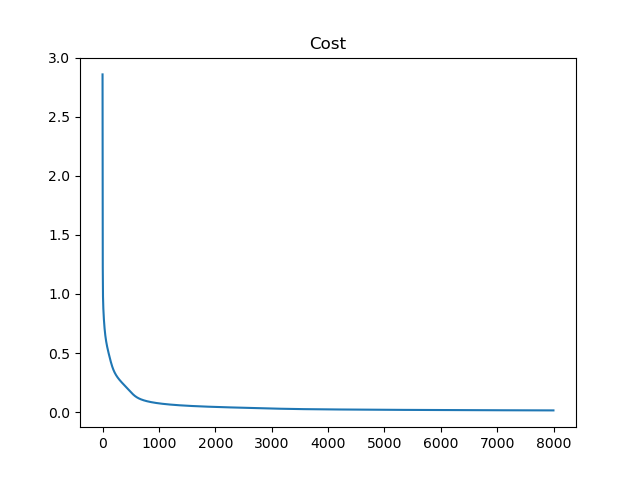

In [42]:
plt.figure()
plt.plot(C)
plt.title("Cost")
plt.show()

<IPython.core.display.Javascript object>


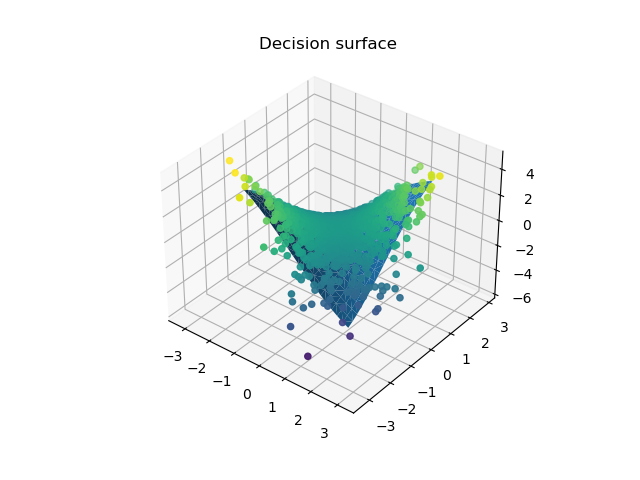

In [41]:
# plot Decision Surface
line = np.linspace(-2,2,20)
xx,yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
_,_,_,Yhat = forward(Xgrid,W,B,A,[7],tanh,i=2,seed=1)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2,antialiased=True)
ax.scatter(X1,X2,T, c=T)
plt.title("Decision surface")
plt.show()